In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
pd.set_option("display.max_rows", 101)
pd.set_option("display.max_columns", 101)
%matplotlib inline

In [2]:
df=pd.read_csv("air_visit_data.csv",parse_dates=["visit_date"])

In [3]:
#元のデータは欠損があるため日時のベースを作成
basedate=pd.DataFrame(list(pd.date_range('2016-05-01', '2016-08-20')))
basedate.columns=["visit_date"]

In [4]:
#店舗を指定、日時を限定
store1=df[df["air_store_id"]=="air_e55abd740f93ecc4"]
store1=store1[(store1["visit_date"]>="2016-05") & (store1["visit_date"]<="2016-08-20")]
store1["visitors"]=store1["visitors"].interpolate()
store2=df[df["air_store_id"]=="air_1653a6c513865af3"]
store2=store2[(store2["visit_date"]>="2016-05") & (store2["visit_date"]<="2016-08-20")]
store2["visitors"]=store2["visitors"].interpolate()

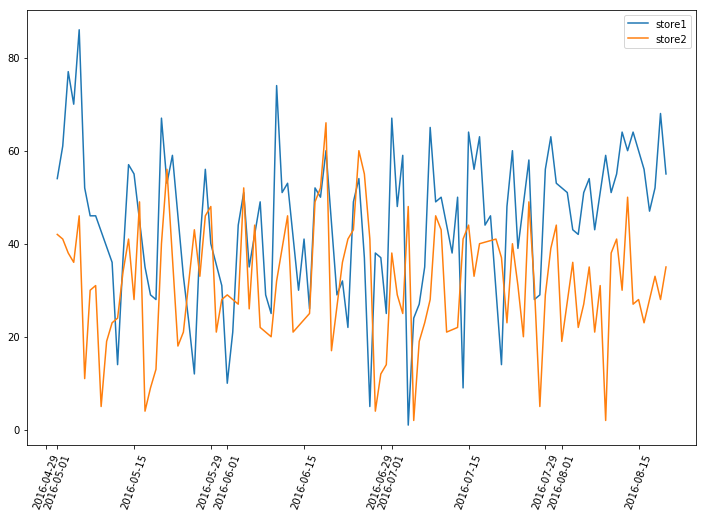

In [5]:
plt.figure(figsize=(12,8))
plt.plot(store1["visit_date"],store1["visitors"],label="store1")
plt.plot(store2["visit_date"],store2["visitors"],label="store2")
plt.xticks(rotation=70)
plt.legend()
plt.show()

In [6]:
#store1が介入群
store1["treatment"]=1
store2["treatment"]=0

In [7]:
df=pd.concat([store1,store2])

In [8]:
#お盆(8/11-8/20)が介入期間
df["postperiod"]=(df["visit_date"]>="2016-08-11").astype(int)

In [9]:
df["treatmentXpostperiod"]=df["treatment"]*df["postperiod"]

In [10]:
#曜日ダミーの追加
weekdays=pd.get_dummies(df["visit_date"].dt.weekday).rename(columns=lambda x:f"weekday_{x}")
df=pd.concat([df,weekdays],axis=1)

In [11]:
df.iloc[:,1:].sample(10)

,visit_date,visitors,treatment,postperiod,treatmentXpostperiod,weekday_0,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
219266,2016-06-10,32,0,0,0,0,0,0,0,1,0,0
219316,2016-08-06,35,0,0,0,0,0,0,0,0,1,0
23665,2016-07-02,48,1,0,0,0,0,0,0,0,1,0
23674,2016-07-12,38,1,0,0,0,1,0,0,0,0,0
23699,2016-08-10,51,1,0,0,0,0,1,0,0,0,0
23618,2016-05-08,46,1,0,0,0,0,0,0,0,0,1
219279,2016-06-26,55,0,0,0,0,0,0,0,0,0,1
219290,2016-07-07,23,0,0,0,0,0,0,1,0,0,0
219242,2016-05-13,34,0,0,0,0,0,0,0,1,0,0
219238,2016-05-09,5,0,0,0,1,0,0,0,0,0,0


In [12]:
#回帰
import statsmodels.api as sm
X=df[['treatment', 'postperiod','treatmentXpostperiod','weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6']]
X["coef"]=1 #切片
y=df["visitors"]
mod = sm.OLS(y,X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               visitors   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.355
Method:                 Least Squares   F-statistic:                     13.03
Date:                Wed, 01 May 2019   Prob (F-statistic):           4.58e-16
Time:                        20:07:57   Log-Likelihood:                -787.21
No. Observations:                 198   AIC:                             1594.
Df Residuals:                     188   BIC:                             1627.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
treatment               11.5724 

/Users/rmizuta/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
